# TODO change some things once they are ready: import of hnx in first cell, and data loading below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np

sys.path.append("..")
import hnx
from hnx.readwrite import load_hypergraph
from hnx.communities.hypergraph_mt.model import HypergraphMT
from hnx.core.hypergraph import Hypergraph

# Training the *Hypergragh-MT* model

In this tutorial, we will show how to train the *Hypergraph-MT* model on a given dataset.

# TODO change data loading once hnx module is available

In [3]:
dataset = 'workplace'
filename = f'../../hoinetx/hoinetx/data/input/{dataset}.npz'
data = np.load(filename, allow_pickle=True)

In [52]:
H = hnx.Hypergraph(data['hyperedges'], weighted=True, weights=data['A'])
print(H)

Hypergraph with 327 nodes and 7818 edges.
Distribution of hyperedge sizes: {2: 5498, 3: 2091, 4: 222, 5: 7}


In [5]:
dataset = 'workplace'
H = load_hypergraph(f"../test_data/{dataset}/{dataset}.pickle", "pickle")
print(H)

Hypergraph with 92 nodes and 788 edges.
Distribution of hyperedge sizes: {2: 742, 3: 44, 4: 2}


## Model training

Training the model simply requires specifying the number $K$ of communities and whether the model needs to be assortative.

In [5]:
%%time

model = HypergraphMT()
u, w, maxL = model.fit(Hnew, K=5, seed=10, normalizeU=False, out_inference=False)

NameError: name 'Hnew' is not defined

In [53]:
%%time

model = HypergraphMT()
u, w, maxL = model.fit(H, K=9, seed=10, normalizeU=False, out_inference=False)

u is initialized around the solution of the Hypergraph Spectral Clustering.
w is initialized randomly.
Updating realization 0 ...
N_real=0 -- num it=46 -- Loglikelihood:407055.1288588521
u is initialized randomly.
w is initialized randomly.
Updating realization 1 ...
N_real=1 -- num it=144 -- Loglikelihood:391915.778579336
u is initialized randomly.
w is initialized randomly.
Updating realization 2 ...
N_real=2 -- num it=131 -- Loglikelihood:393064.02161420905
u is initialized randomly.
w is initialized randomly.
Updating realization 3 ...
N_real=3 -- num it=263 -- Loglikelihood:371649.7474303625
u is initialized randomly.
w is initialized randomly.
Updating realization 4 ...
N_real=4 -- num it=93 -- Loglikelihood:371713.43536923523
u is initialized randomly.
w is initialized randomly.
Updating realization 5 ...
N_real=5 -- num it=146 -- Loglikelihood:386579.52933847817
u is initialized randomly.
w is initialized randomly.
Updating realization 6 ...
N_real=6 -- num it=215 -- Loglikelih

In [10]:
import pandas as pd

In [80]:
meta = pd.read_csv('../test_data/workplace/workplace_meta.csv')
meta

,nodeID,nodeName,class,classID
0,0,35,DISQ,0
1,1,131,DISQ,0
2,2,184,DISQ,0
3,3,185,DISQ,0
4,4,210,DISQ,0
...,...,...,...,...
87,87,271,SRH,4
88,88,448,SRH,4
89,89,481,SRH,4
90,90,492,SRH,4


In [84]:
mapping_new = {n:i for i,n in enumerate(sorted(Hnew.get_nodes()))}
mapping_new

{15: 0,
 17: 1,
 21: 2,
 29: 3,
 35: 4,
 39: 5,
 48: 6,
 50: 7,
 56: 8,
 63: 9,
 66: 10,
 79: 11,
 80: 12,
 87: 13,
 95: 14,
 101: 15,
 102: 16,
 105: 17,
 113: 18,
 116: 19,
 118: 20,
 119: 21,
 120: 22,
 122: 23,
 123: 24,
 131: 25,
 132: 26,
 134: 27,
 150: 28,
 153: 29,
 154: 30,
 164: 31,
 172: 32,
 179: 33,
 181: 34,
 184: 35,
 185: 36,
 194: 37,
 196: 38,
 205: 39,
 209: 40,
 210: 41,
 211: 42,
 213: 43,
 222: 44,
 223: 45,
 240: 46,
 242: 47,
 253: 48,
 255: 49,
 265: 50,
 267: 51,
 268: 52,
 271: 53,
 272: 54,
 273: 55,
 275: 56,
 285: 57,
 311: 58,
 335: 59,
 431: 60,
 448: 61,
 481: 62,
 492: 63,
 494: 64,
 496: 65,
 499: 66,
 511: 67,
 513: 68,
 533: 69,
 601: 70,
 603: 71,
 662: 72,
 709: 73,
 743: 74,
 751: 75,
 762: 76,
 765: 77,
 771: 78,
 778: 79,
 779: 80,
 784: 81,
 786: 82,
 791: 83,
 804: 84,
 819: 85,
 826: 86,
 845: 87,
 875: 88,
 938: 89,
 939: 90,
 987: 91}

In [85]:
mapping = {n:mapping_new[n] for n in meta.nodeName}
mapping

{35: 4,
 131: 25,
 184: 35,
 185: 36,
 210: 41,
 743: 74,
 751: 75,
 253: 48,
 255: 49,
 265: 50,
 778: 79,
 268: 52,
 273: 55,
 826: 86,
 845: 87,
 17: 1,
 21: 2,
 48: 6,
 50: 7,
 66: 10,
 80: 12,
 101: 15,
 102: 16,
 105: 17,
 118: 20,
 119: 21,
 134: 27,
 179: 33,
 209: 40,
 240: 46,
 762: 76,
 771: 78,
 784: 81,
 275: 56,
 285: 57,
 804: 84,
 335: 59,
 875: 88,
 938: 89,
 431: 60,
 511: 67,
 513: 68,
 15: 0,
 29: 3,
 39: 5,
 56: 8,
 79: 11,
 603: 71,
 95: 14,
 113: 18,
 120: 22,
 123: 24,
 132: 26,
 662: 72,
 164: 31,
 172: 32,
 181: 34,
 194: 37,
 196: 38,
 205: 39,
 222: 44,
 223: 45,
 242: 47,
 765: 77,
 267: 51,
 779: 80,
 272: 54,
 786: 82,
 791: 83,
 819: 85,
 311: 58,
 939: 90,
 987: 91,
 494: 64,
 496: 65,
 87: 13,
 116: 19,
 211: 42,
 213: 43,
 533: 69,
 63: 9,
 601: 70,
 122: 23,
 150: 28,
 153: 29,
 154: 30,
 709: 73,
 271: 53,
 448: 61,
 481: 62,
 492: 63,
 499: 66}

In [ ]:
H.

In [113]:
Hnew.binary_incidence_matrix(return_mapping=True)

(<92x788 sparse array of type '<class 'numpy.uint8'>'
 	with 1624 stored elements in Compressed Sparse Row format>,
 {0: 15,
  1: 17,
  2: 21,
  3: 29,
  4: 35,
  5: 39,
  6: 48,
  7: 50,
  8: 56,
  9: 63,
  10: 66,
  11: 79,
  12: 80,
  13: 87,
  14: 95,
  15: 101,
  16: 102,
  17: 105,
  18: 113,
  19: 116,
  20: 118,
  21: 119,
  22: 120,
  23: 122,
  24: 123,
  25: 131,
  26: 132,
  27: 134,
  28: 150,
  29: 153,
  30: 154,
  31: 164,
  32: 172,
  33: 179,
  34: 181,
  35: 184,
  36: 185,
  37: 194,
  38: 196,
  39: 205,
  40: 209,
  41: 210,
  42: 211,
  43: 213,
  44: 222,
  45: 223,
  46: 240,
  47: 242,
  48: 253,
  49: 255,
  50: 265,
  51: 267,
  52: 268,
  53: 271,
  54: 272,
  55: 273,
  56: 275,
  57: 285,
  58: 311,
  59: 335,
  60: 431,
  61: 448,
  62: 481,
  63: 492,
  64: 494,
  65: 496,
  66: 499,
  67: 511,
  68: 513,
  69: 533,
  70: 601,
  71: 603,
  72: 662,
  73: 709,
  74: 743,
  75: 751,
  76: 762,
  77: 765,
  78: 771,
  79: 778,
  80: 779,
  81: 784,
  82: 7

In [114]:
mapping.values()

dict_values([4, 25, 35, 36, 41, 74, 75, 48, 49, 50, 79, 52, 55, 86, 87, 1, 2, 6, 7, 10, 12, 15, 16, 17, 20, 21, 27, 33, 40, 46, 76, 78, 81, 56, 57, 84, 59, 88, 89, 60, 67, 68, 0, 3, 5, 8, 11, 71, 14, 18, 22, 24, 26, 72, 31, 32, 34, 37, 38, 39, 44, 45, 47, 77, 51, 80, 54, 82, 83, 85, 58, 90, 91, 64, 65, 13, 19, 42, 43, 69, 9, 70, 23, 28, 29, 30, 73, 53, 61, 62, 63, 66])

In [99]:
Hnew.binary_incidence_matrix().toarray()[list(mapping.values())].sum(axis=1)

array([12, 18, 26,  9,  4, 10, 22, 18, 21, 27, 21, 19, 17, 27,  9, 19, 17,
       16, 25,  9, 31, 13, 21, 10,  9, 21, 34, 14, 20, 16, 18, 16,  8, 20,
       16, 48, 17, 28,  5, 17,  6,  6,  8, 24, 29, 22, 21, 11, 38, 16, 26,
       30, 16, 30, 13, 15, 16, 28, 17, 17, 27, 31,  6, 15, 28, 15,  4,  7,
        4, 15, 42, 15, 10,  9, 22,  4, 20, 18,  7, 16, 29, 11, 11, 24, 19,
       18, 13, 18, 15, 13, 10, 11], dtype=uint64)

In [101]:
H.binary_incidence_matrix().toarray().sum(axis=1)

array([12, 18, 26,  9,  4, 10, 22, 18, 21, 27, 21, 19, 17, 27,  9, 19, 17,
       16, 25,  9, 31, 13, 21, 10,  9, 21, 34, 14, 20, 16, 18, 16,  8, 20,
       16, 48, 17, 28,  5, 17,  6,  6,  8, 24, 29, 22, 21, 11, 38, 16, 26,
       30, 16, 30, 13, 15, 16, 28, 17, 17, 27, 31,  6, 15, 28, 15,  4,  7,
        4, 15, 42, 15, 10,  9, 22,  4, 20, 18,  7, 16, 29, 11, 11, 24, 19,
       18, 13, 18, 15, 13, 10, 11], dtype=uint64)

In [102]:
import matplotlib.pyplot as plt

In [112]:
np.max(u_new)

16.438114099378975

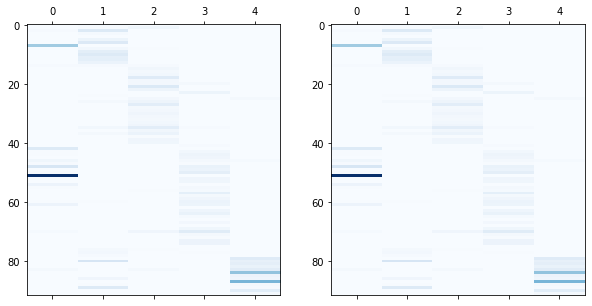

In [118]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].matshow(u_new, cmap='Blues', aspect='auto')
ax[1].matshow(u, cmap='Blues', aspect='auto')
plt.show()

In [9]:
w

array([[3.66497360e+000, 1.25090800e+001, 1.25793927e+001,
        1.76251687e+001, 1.04493702e+001],
       [1.61763767e-002, 2.21449135e-002, 1.83299323e-002,
        4.43662401e-002, 2.63779711e-003],
       [4.75317009e-210, 0.00000000e+000, 0.00000000e+000,
        6.17174684e-004, 0.00000000e+000]])

In [119]:
u

array([[1.01864837e-02, 2.00624690e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 6.31497433e-02, 5.30040492e-01, 0.00000000e+00,
        8.69110208e-03],
       [1.43115431e-01, 1.75858927e+00, 0.00000000e+00, 6.95917292e-03,
        0.00000000e+00],
       [0.00000000e+00, 2.05014059e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.01169421e-02, 4.03716330e-03, 0.00000000e+00,
        0.00000000e+00],
       [2.08209008e-02, 7.43551009e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.85023068e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.99336275e+00, 0.00000000e+00, 6.67886417e-03, 0.00000000e+00,
        0.00000000e+00],
       [3.21545551e-02, 4.13846751e-01, 5.57569869e-02, 1.18661487e-02,
        1.29175954e-02],
       [0.00000000e+00, 1.37429070e+00, 2.37121164e-02, 1.79284099e-02,
        0.00000000e+00],
       [0.00000000e+00, 1.7192

In [70]:
w

array([[1.48375513e+01, 1.15830047e+01, 3.64034413e+00, 5.92132224e+00,
        2.16510703e+01],
       [2.64279812e-02, 2.78153240e-02, 1.17812972e-03, 1.59680638e-03,
        5.78192930e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.41547200e-04]])

In [10]:
model.train_info

,realization,seed,iter,loglik,runtime,reached_convergence
0,0,10,0,15260.805774,0.029972,False
1,0,10,1,15511.876956,0.030401,False
2,0,10,2,15628.890301,0.031680,False
3,0,10,3,15698.222098,0.033345,False
4,0,10,4,15728.848500,0.027752,False
...,...,...,...,...,...,...
1032,14,5909906,86,15830.759796,0.018154,False
1033,14,5909906,87,15830.834891,0.018506,False
1034,14,5909906,88,15830.910087,0.018711,False
1035,14,5909906,89,15830.984085,0.018209,False
